# Clustering Distance Measures
 Distance Matrix Computation
 Data Preparation
 Subset of the data

In [11]:
set.seed(123)
ss <- sample(1:50, 15) # Take 15 random rows
df <- USArrests[ss, ] # Subset the 15 rows
df.scaled <- scale(df) # Standardize the variables

In [12]:
#  compute distances between rows of the data.
  dist.eucl <- dist(df.scaled, method = "euclidean")

In [13]:
# Reformat as a matrix
# Subset the first 3 columns and rows and Round the values
round(as.matrix(dist.eucl)[1:3, 1:3], 1)

,Iowa,Rhode Island,Maryland
Iowa,0.0,2.8,4.1
Rhode Island,2.8,0.0,3.6
Maryland,4.1,3.6,0.0


 Computing correlation based distances
*** The function get_dist()[factoextra package] can be used to compute correlation-based
distances. Correlation method can be either pearson, spearman or kendall. ***

In [14]:
 library("factoextra")
dist.cor <- get_dist(df.scaled, method = "pearson")

In [15]:
# Display a subset
round(as.matrix(dist.cor)[1:3, 1:3], 1)


,Iowa,Rhode Island,Maryland
Iowa,0.0,0.4,1.9
Rhode Island,0.4,0.0,1.5
Maryland,1.9,1.5,0.0


In [16]:
#Computing distances for mixed data
 library(cluster)
# Load data
data(flower)
head(flower, 3)

V1,V2,V3,V4,V5,V6,V7,V8
<fct>,<fct>,<fct>,<fct>,<ord>,<ord>,<dbl>,<dbl>
0,1,1,4,3,15,25,15
1,0,0,2,1,3,150,50
0,1,0,3,3,1,150,50


In [17]:
# Data structure
str(flower)

'data.frame':	18 obs. of  8 variables:
 $ V1: Factor w/ 2 levels "0","1": 1 2 1 1 1 1 1 1 2 2 ...
 $ V2: Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 1 2 2 ...
 $ V3: Factor w/ 2 levels "0","1": 2 1 1 2 1 1 1 2 1 1 ...
 $ V4: Factor w/ 5 levels "1","2","3","4",..: 4 2 3 4 5 4 4 2 3 5 ...
 $ V5: Ord.factor w/ 3 levels "1"<"2"<"3": 3 1 3 2 2 3 3 2 1 2 ...
 $ V6: Ord.factor w/ 18 levels "1"<"2"<"3"<"4"<..: 15 3 1 16 2 12 13 7 4 14 ...
 $ V7: num  25 150 150 125 20 50 40 100 25 100 ...
 $ V8: num  15 50 50 50 15 40 20 15 15 60 ...


In [18]:
# Distance matrix
dd <- daisy(flower)
round(as.matrix(dd)[1:3, 1:3], 2)

1,2,3
0.00,0.89,0.53
0.89,0.00,0.51
0.53,0.51,0.00


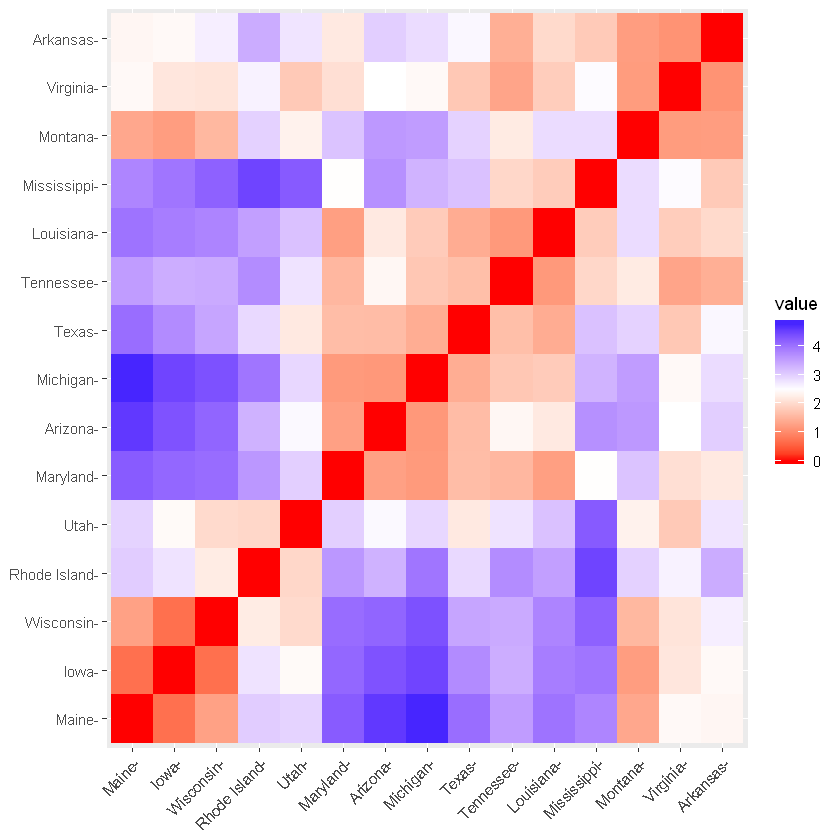

In [19]:
# Visualizing distance matrices

library(factoextra)
fviz_dist(dist.eucl)


# Partioning Clustering

In [20]:
#K - Means Algorithm
# Data

data("USArrests") # Loading the data set
df <- scale(USArrests) # Scaling the data

In [21]:
# View the firt 3 rows of the data
head(df, n = 3)

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388


*** The standard R function for k-means clustering is kmeans() [stats package], which
simplified format is as follow:
  kmeans(x, centers, iter.max = 10, nstart = 1) ***

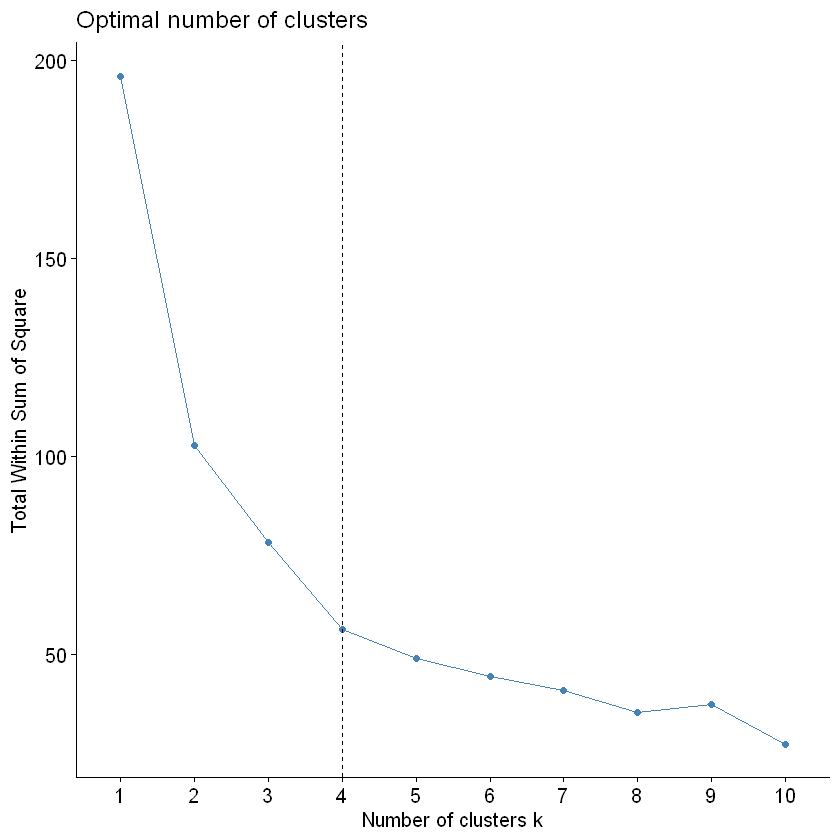

In [22]:
# Estimating the optimal number of clusters
library(factoextra)
fviz_nbclust(df, kmeans, method = "wss") +
  geom_vline(xintercept = 4, linetype = 2)

In [23]:
# Computing k-means clustering
# Compute k-means with k = 4
set.seed(123)
km.res <- kmeans(df, 4, nstart = 25)

In [24]:
# Print the results
print(km.res)

K-means clustering with 4 clusters of sizes 13, 16, 13, 8

Cluster means:
      Murder    Assault   UrbanPop        Rape
1 -0.9615407 -1.1066010 -0.9301069 -0.96676331
2 -0.4894375 -0.3826001  0.5758298 -0.26165379
3  0.6950701  1.0394414  0.7226370  1.27693964
4  1.4118898  0.8743346 -0.8145211  0.01927104

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             4              3              3              4              3 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             3              2              2              3              4 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             2              1              3              2              1 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             2              1              4              1              3 
 Massachusetts       Michigan      Minnesota    Mississippi    

In [25]:
# It’s possible to compute the mean of each variables by clusters using the original data
aggregate(USArrests, by=list(cluster=km.res$cluster), mean)
dd <- cbind(USArrests, cluster = km.res$cluster)
head(dd)

cluster,Murder,Assault,UrbanPop,Rape
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.60000,78.53846,52.07692,12.17692
2,5.65625,138.87500,73.87500,18.78125
3,10.81538,257.38462,76.00000,33.19231
4,13.93750,243.62500,53.75000,21.41250


,Murder,Assault,UrbanPop,Rape,cluster
,<dbl>,<int>,<int>,<dbl>,<int>
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,3
Arizona,8.1,294,80,31.0,3
Arkansas,8.8,190,50,19.5,4
California,9.0,276,91,40.6,3
Colorado,7.9,204,78,38.7,3


In [26]:
# Accessing to the results of kmeans() function
# Cluster number for each of the observations
km.res$cluster
head(km.res$cluster, 4)

Alabama         Alaska        Arizona       Arkansas     California 
             4              3              3              4              3 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             3              2              2              3              4 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             2              1              3              2              1 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             2              1              4              1              3 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              3              1              4              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             1              1              3              1              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             3              3              4              1              2 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              2              2              4 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             1              4              3              2              1 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              1              1              2

Alabama   Alaska  Arizona Arkansas 
       4        3        3        4

In [27]:
# Cluster means
km.res$centers

Murder,Assault,UrbanPop,Rape
-0.9615407,-1.1066010,-0.9301069,-0.96676331
-0.4894375,-0.3826001,0.5758298,-0.26165379
0.6950701,1.0394414,0.7226370,1.27693964
1.4118898,0.8743346,-0.8145211,0.01927104


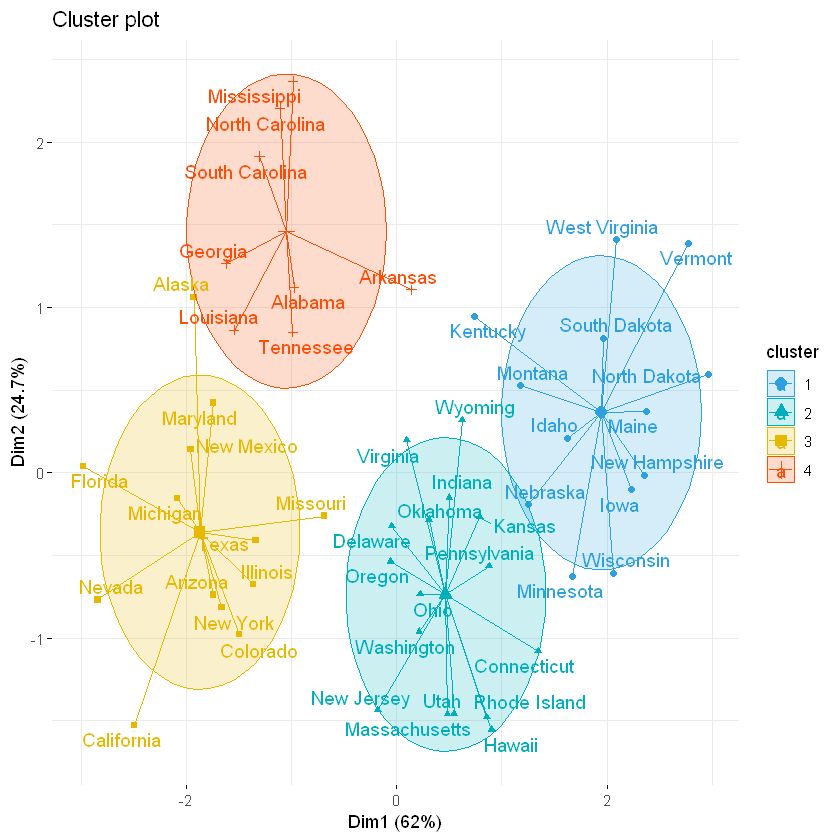

In [28]:
# Visualizing k-means clusters
fviz_cluster(km.res, data = df,
             palette = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07"),
             ellipse.type = "euclid", # Concentration ellipse
             star.plot = TRUE, # Add segments from centroids to items
             repel = TRUE, # Avoid label overplotting (slow)
             ggtheme = theme_minimal()
)

# K-Mediods
*** The most common k-medoids clustering methods is the PAMalgorithm (Partitioning
                                                                      Around Medoids
                                                                      ***
*** PAM concept

In [29]:
# Computing PAM in R
# Data
data("USArrests") # Load the data set
df <- scale(USArrests) # Scale the data

In [30]:
head(df, n = 3) # View the firt 3 rows of the data 

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388


In [31]:
# Usage
# pam(x, k, metric = "euclidean", stand = FALSE)

In [32]:
library(cluster)
library(factoextra) 

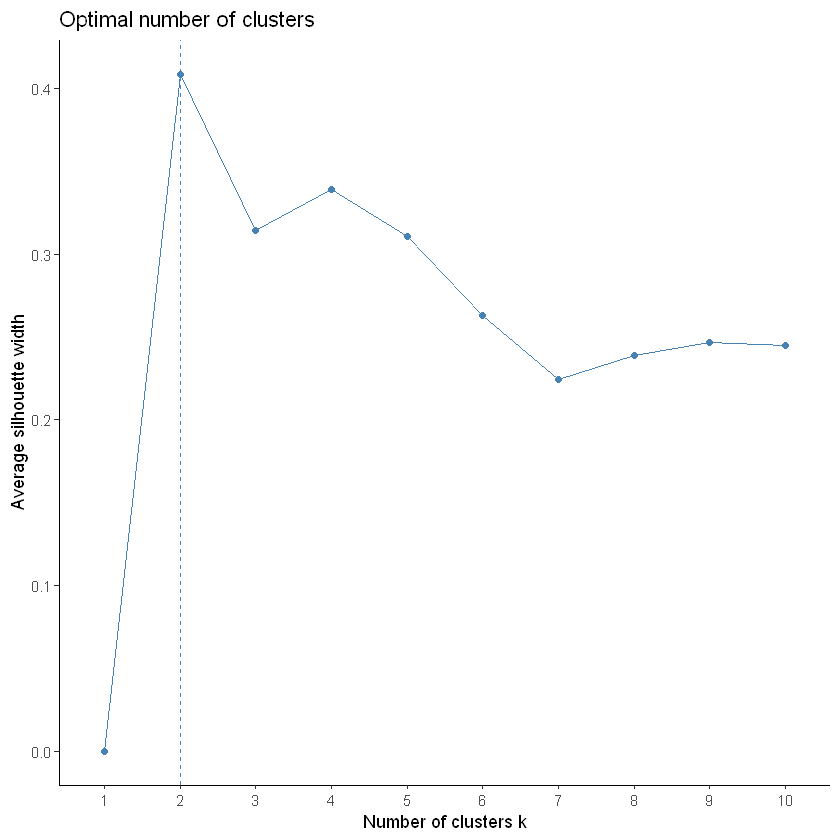

In [33]:
fviz_nbclust(df, pam, method = "silhouette")+
  theme_classic()

In [34]:
pam.res <- pam(df, 2)
print(pam.res)

Medoids:
           ID     Murder    Assault   UrbanPop       Rape
New Mexico 31  0.8292944  1.3708088  0.3081225  1.1603196
Nebraska   27 -0.8008247 -0.8250772 -0.2445636 -0.5052109
Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             1              2              2              1              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             2              2              1              2              2 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             2              2              1              2              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              2              1              1 
       Montana       Nebraska         

In [36]:
dd <- cbind(USArrests, cluster = pam.res$cluster)
head(dd, n = 3)

,Murder,Assault,UrbanPop,Rape,cluster
,<dbl>,<int>,<int>,<dbl>,<int>
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1


In [37]:
# Cluster medoids: New Mexico, Nebraska
pam.res$medoids

,Murder,Assault,UrbanPop,Rape
New Mexico,0.8292944,1.3708088,0.3081225,1.1603196
Nebraska,-0.8008247,-0.8250772,-0.2445636,-0.5052109


In [39]:
# Cluster numbers
head(pam.res$clustering)

Alabama     Alaska    Arizona   Arkansas California   Colorado 
         1          1          1          2          1          1

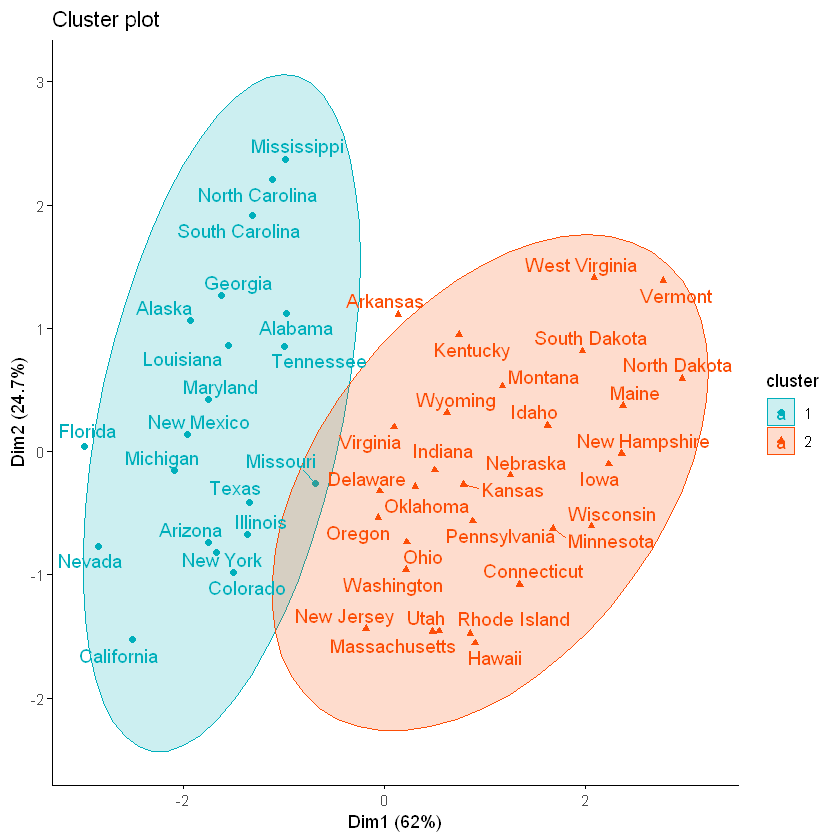

In [40]:
#Visualizing PAM clusters
fviz_cluster(pam.res,
             palette = c("#00AFBB", "#FC4E07"), # color palette
             ellipse.type = "t", # Concentration ellipse
             repel = TRUE, # Avoid label overplotting (slow)
             ggtheme = theme_classic()
)


# Hierarchial Clustering

In [42]:
#Agglomerative Clustering
# Load the data
data("USArrests")

In [43]:
# Standardize the data
df <- scale(USArrests) 

In [44]:
# Show the first 6 rows
head(df, nrow = 6)

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207


In [45]:
# Compute the dissimilarity matrix
# df = the standardized data
res.dist <- dist(df, method = "euclidean")
as.matrix(res.dist)[1:6, 1:6]

,Alabama,Alaska,Arizona,Arkansas,California,Colorado
Alabama,0.000000,2.703754,2.293520,1.289810,3.263110,2.651067
Alaska,2.703754,0.000000,2.700643,2.826039,3.012541,2.326519
Arizona,2.293520,2.700643,0.000000,2.717758,1.310484,1.365031
Arkansas,1.289810,2.826039,2.717758,0.000000,3.763641,2.831051
California,3.263110,3.012541,1.310484,3.763641,0.000000,1.287619
Colorado,2.651067,2.326519,1.365031,2.831051,1.287619,0.000000


In [46]:
# R base function hclust() can be used to create the hierarchical tree.
# hclust() can be used as follow: 
res.hc <- hclust(d = res.dist, method = "ward.D2")  

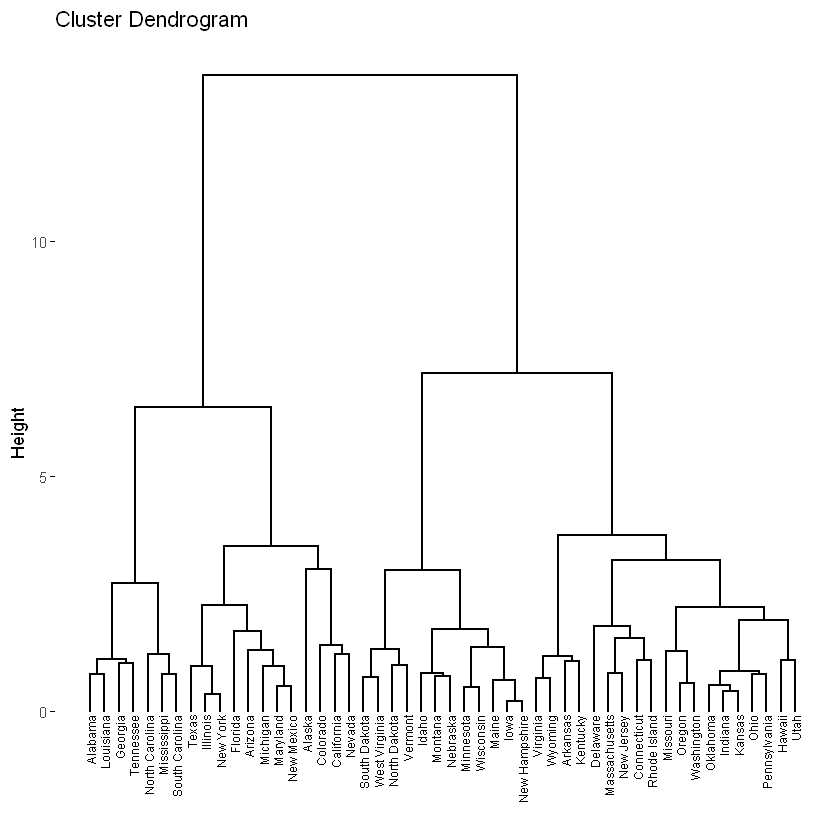

In [47]:
# cex: label size
library("factoextra")
fviz_dend(res.hc, cex = 0.5)

In [49]:
#Verify the cluster tree
# Compute cophentic distance
res.coph <- cophenetic(res.hc)

In [50]:
# Correlation between cophenetic distance and
# the original distance
cor(res.dist, res.coph)

[1] 0.6975266

In [51]:
#Cut the dendrogram into different groups
# Cut tree into 4 groups
grp <- cutree(res.hc, k = 4)
head(grp, n = 4)

Alabama   Alaska  Arizona Arkansas 
       1        2        2        3

In [52]:
# Get the names for the members of cluster 1
rownames(df)[grp == 1]

[1] "Alabama"        "Georgia"        "Louisiana"      "Mississippi"   
[5] "North Carolina" "South Carolina" "Tennessee"

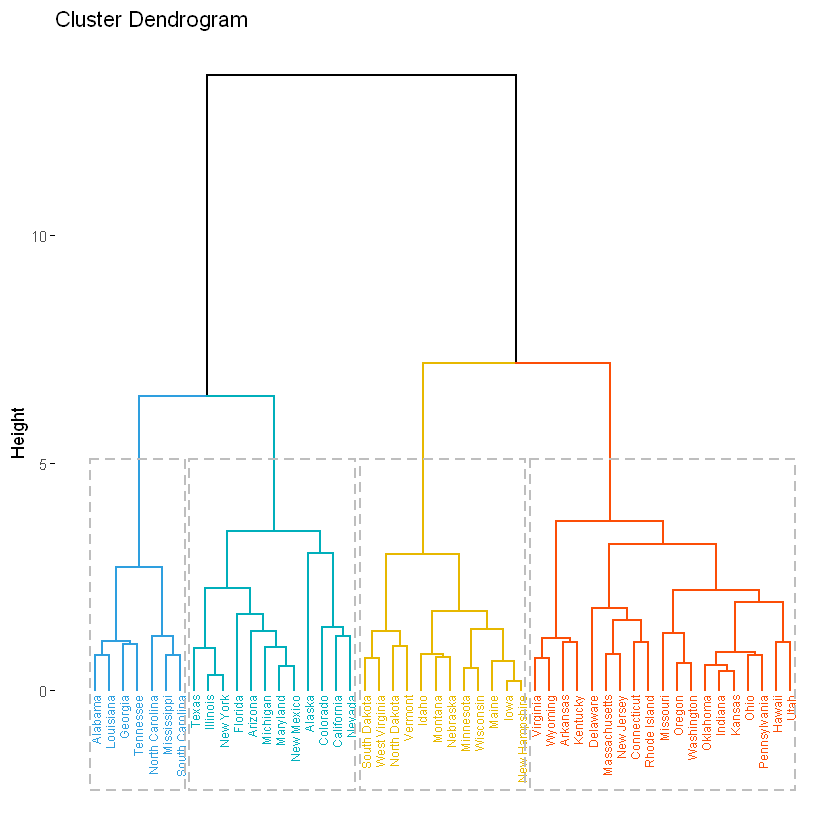

In [53]:
# Cut in 4 groups and color by groups
fviz_dend(res.hc, k = 4, # Cut in four groups
          cex = 0.5, # label size
          k_colors = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07"),
          color_labels_by_k = TRUE, # color labels by groups
          rect = TRUE # Add rectangle around groups
)

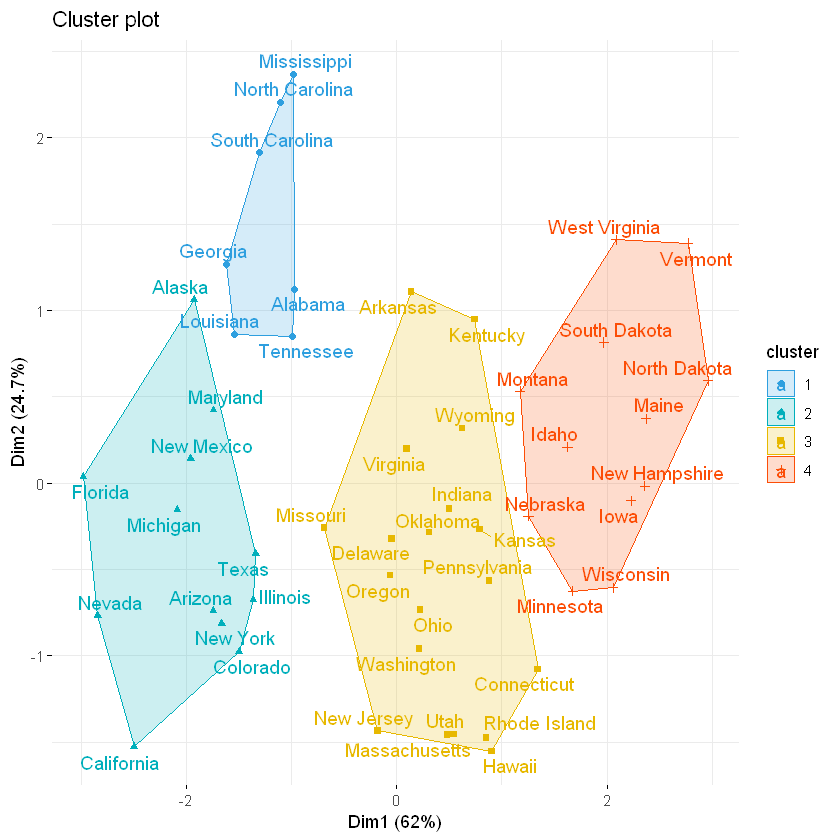

In [54]:
fviz_cluster(list(data = df, cluster = grp),
             palette = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07"),
             ellipse.type = "convex", # Concentration ellipse
             repel = TRUE, # Avoid label overplotting (slow)
             show.clust.cent = FALSE, ggtheme = theme_minimal())

In [55]:
# Cluster R package
library("cluster")
# Agglomerative Nesting (Hierarchical Clustering)
res.agnes <- agnes(x = USArrests, # data matrix
                   stand = TRUE, # Standardize the data
                   metric = "euclidean", # metric for distance matrix
                   method = "ward" # Linkage method
)

In [56]:
# DIvisive ANAlysis Clustering
res.diana <- diana(x = USArrests, # data matrix
                   stand = TRUE, # standardize the data
                   metric = "euclidean" # metric for distance matrix
)

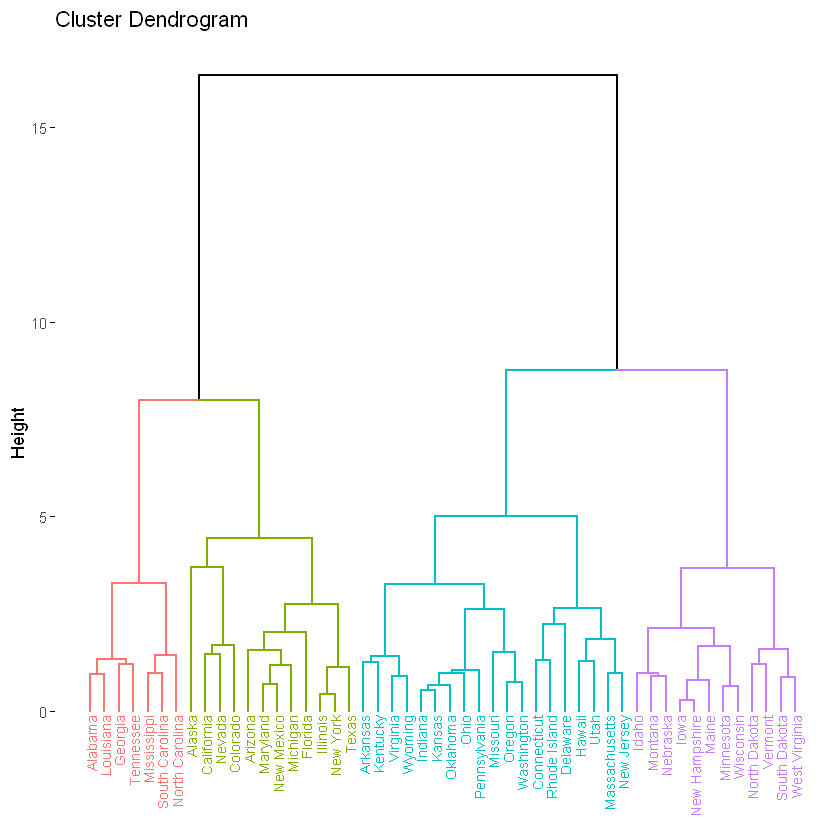

In [57]:
fviz_dend(res.agnes, cex = 0.6, k = 4)

# Density Based Clustering Algorithm


In [58]:
# DBSCAN (Density-Based Spatial Clustering and Application with Noise),
#Computing DBSCAN
library(fpc)
library(dbscan)

Warning message:
"package 'fpc' was built under R version 3.5.3"Warning message:
"package 'dbscan' was built under R version 3.5.3"
Attaching package: 'dbscan'

The following object is masked from 'package:fpc':

    dbscan



In [59]:
# Load the data
data("multishapes", package = "factoextra")
df <- multishapes[, 1:2]

In [60]:
# Compute DBSCAN using fpc package
set.seed(123)
db <- fpc::dbscan(df, eps = 0.15, MinPts = 5)

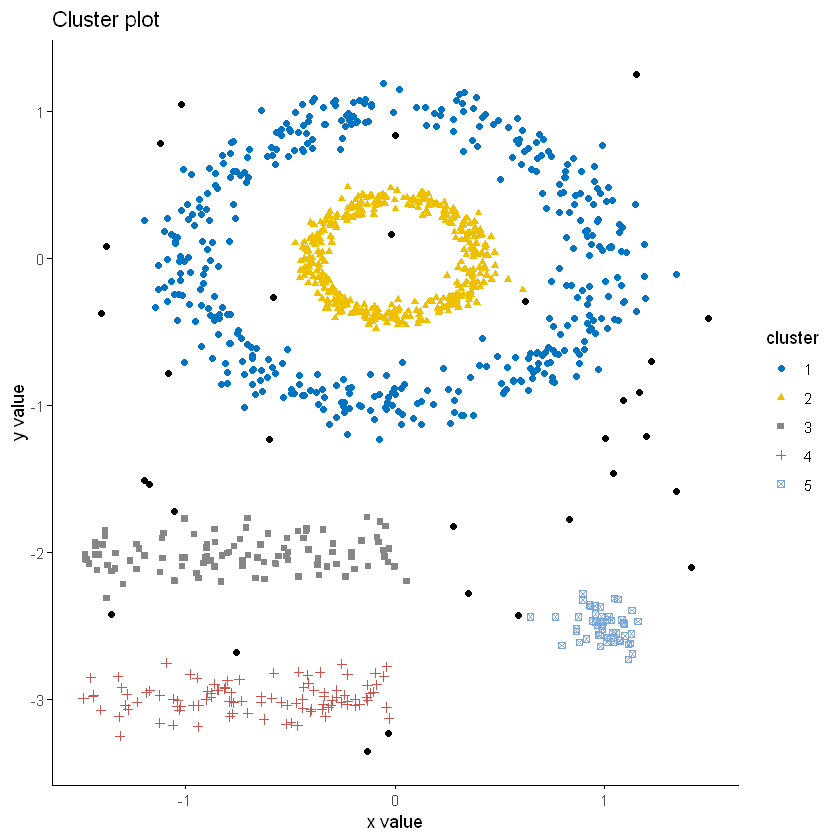

In [61]:
# Plot DBSCAN results
library("factoextra")
fviz_cluster(db, data = df, stand = FALSE,
             ellipse = FALSE, show.clust.cent = FALSE,
             geom = "point",palette = "jco", ggtheme = theme_classic())

In [62]:
print(db)

dbscan Pts=1100 MinPts=5 eps=0.15
        0   1   2   3  4  5
border 31  24   1   5  7  1
seed    0 386 404  99 92 50
total  31 410 405 104 99 51


[1] 1 3 2 4 3 1 2 4 2 2 2 2 2 2 1 4 1 1 1 0

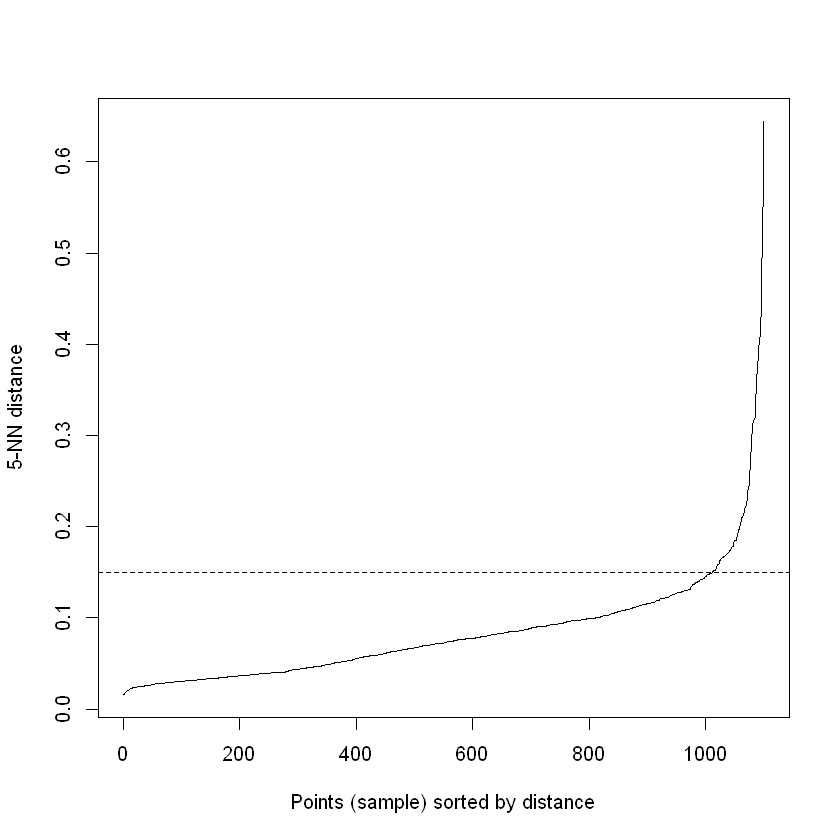

In [63]:
# Cluster membership. Noise/outlier observations are coded as 0
# A random subset is shown
db$cluster[sample(1:1089, 20)]
dbscan::kNNdistplot(df, k = 5)
abline(h = 0.15, lty = 2)
